<a href="https://colab.research.google.com/github/Pam-Pam29/linear_regression_model/blob/main/Health_Insurance_Model_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Lbraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Read Data

In [98]:
link = 'https://raw.githubusercontent.com/Pam-Pam29/linear_regression_model/refs/heads/main/insurance.csv'
df = pd.read_csv(link)
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Shape of the Dataset

In [99]:
df.shape

(1338, 7)

### Summary of the Dataset

In [100]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Data Types

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Check for duplicated values

In [102]:
sum(df.duplicated())

1

In [103]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [104]:
df[df['charges'] == 1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [105]:
df.drop(index=(581), inplace=True)

In [106]:
sum(df.duplicated())

0

In [107]:
df.shape

(1337, 7)

In [108]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Age Distribution

In [109]:
fig = px.histogram(df, x='age', nbins=30, title='Age Distribution')
fig.show()

In [110]:
fig = px.box(df, x='age', title='Age Distribution')
fig.show()

In [111]:
age_min = df['age'].min()
age_max = df['age'].max()
num_bins = 5
bins = np.linspace(age_min, age_max, num_bins + 1)
labels = [f'{int(bins[i])}-{int(bins[i+1])-1}' for i in range(num_bins)]
labels[-1] = f'{int(bins[-2])}+'

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True, right=False)

In [112]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,18-26
1,18,male,33.770,1,no,southeast,1725.55230,18-26
2,28,male,33.000,3,no,southeast,4449.46200,27-35
3,33,male,22.705,0,no,northwest,21984.47061,27-35
4,32,male,28.880,0,no,northwest,3866.85520,27-35


In [113]:
df['age_group'].value_counts()

,count
age_group,
18-26,361
45-53,258
36-44,239
27-35,237
54+,220


In [114]:
df.groupby('age_group', observed=False)['charges'].mean()

,charges
age_group,
18-26,9118.853271
27-35,10991.125921
36-44,13628.318836
45-53,15968.998082
54+,18037.050766


In [115]:
df.loc[:, list(df.columns[1:])].head()

,sex,bmi,children,smoker,region,charges,age_group
0,female,27.900,0,yes,southwest,16884.92400,18-26
1,male,33.770,1,no,southeast,1725.55230,18-26
2,male,33.000,3,no,southeast,4449.46200,27-35
3,male,22.705,0,no,northwest,21984.47061,27-35
4,male,28.880,0,no,northwest,3866.85520,27-35


###Data Visualization

In [116]:
numerical_data = pd.get_dummies(df.loc[:, list(df.columns[:-1])])
numerical_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


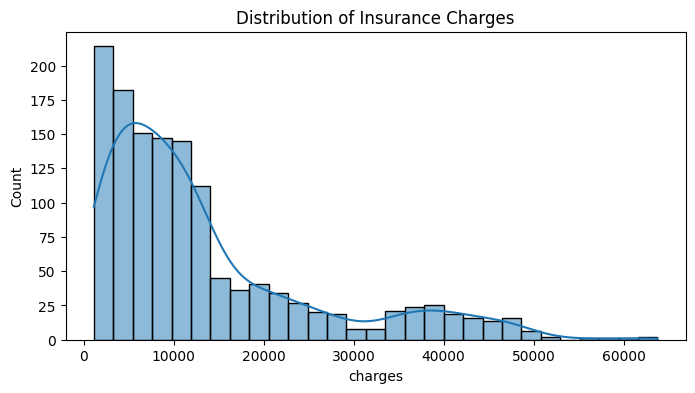

In [117]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='charges', kde=True)
plt.title('Distribution of Insurance Charges')
plt.show()

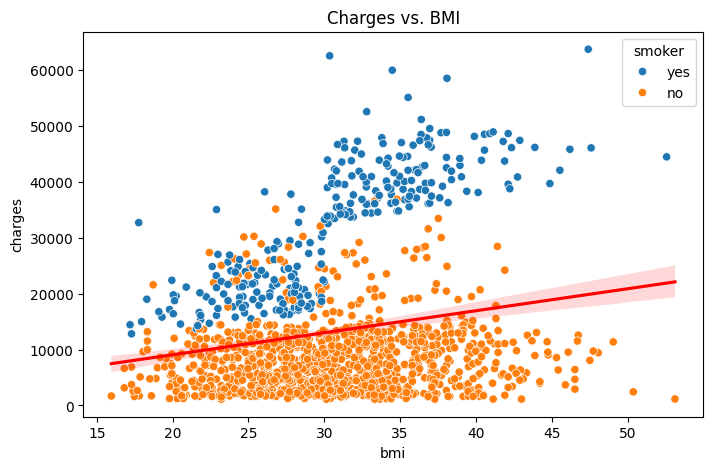

In [118]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
sns.regplot(x='bmi', y='charges', data=df, scatter=False, color='red', label='Regression Line')
plt.title('Charges vs. BMI')
plt.show()

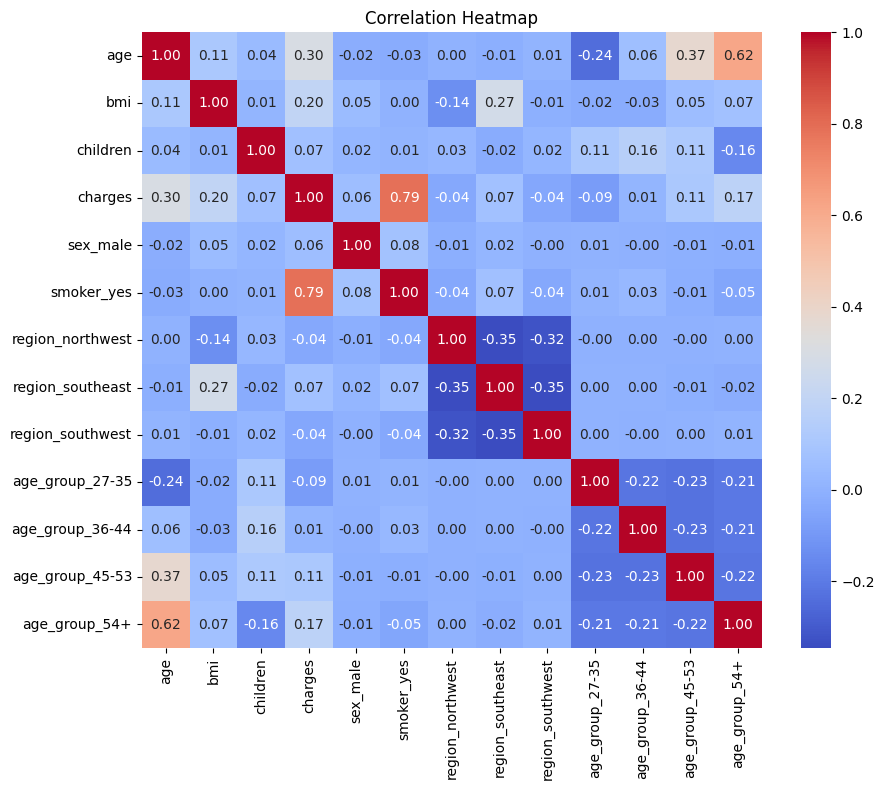

In [119]:
data_encoded = pd.get_dummies(df, drop_first=True)
plt.figure(figsize=(10,8))
sns.heatmap(data_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

###Standardization

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###Data Split

In [121]:
X = numerical_data.drop(columns=['charges'])
Y = numerical_data['charges']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

###Linear Regression

In [123]:
lr = LinearRegression()

In [124]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [125]:
y_pred_lr = lr.predict(X_test_scaled)

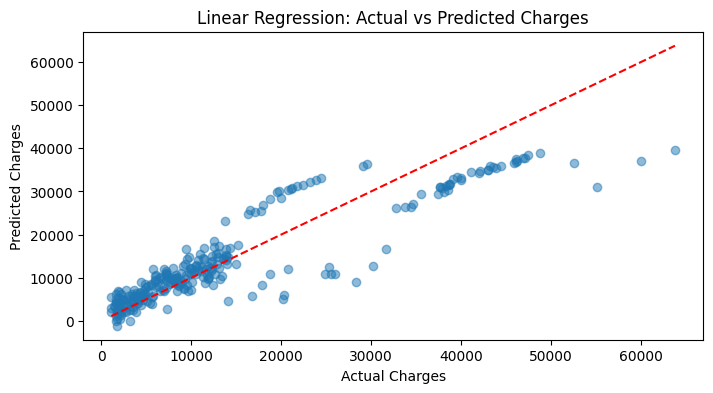

In [126]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression: Actual vs Predicted Charges')
plt.show()

###SGD Linear Regression

In [127]:
from sklearn.linear_model import SGDRegressor

In [128]:
sgd = SGDRegressor()

In [129]:
sgd.fit(X_train_scaled, y_train)

SGDRegressor()

In [130]:
y_pred_sgd = sgd.predict(X_test_scaled)

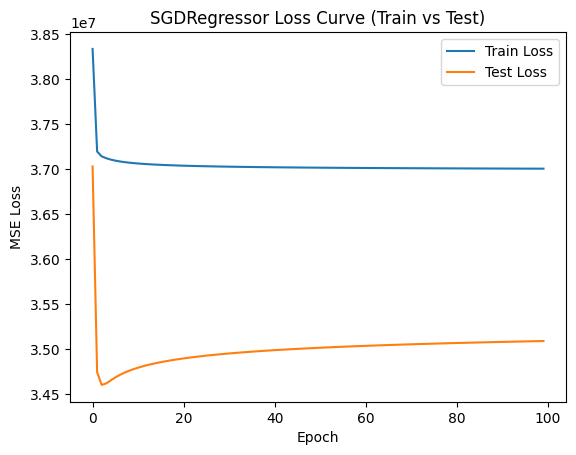

In [131]:
n_epochs = 100
sgd = SGDRegressor(max_iter=1, tol=None, random_state=42, learning_rate='invscaling', eta0=0.01, warm_start=True)

train_losses = []
test_losses = []

for epoch in range(n_epochs):
    sgd.partial_fit(X_train_scaled, y_train)
    y_train_pred = sgd.predict(X_train_scaled)
    y_test_pred = sgd.predict(X_test_scaled)
    train_loss = mean_squared_error(y_train, y_train_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('SGDRegressor Loss Curve (Train vs Test)')
plt.legend()
plt.show()

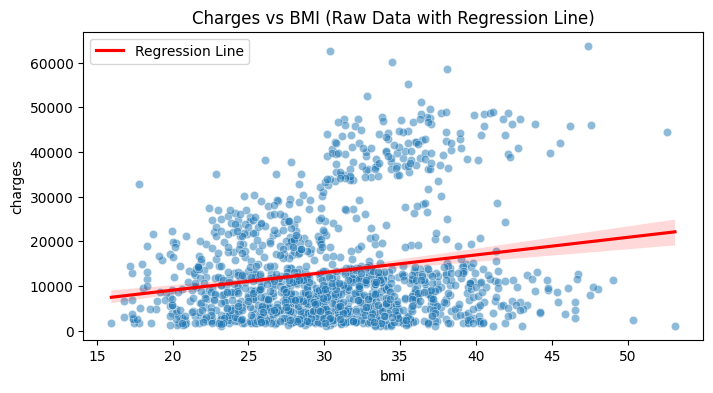

In [132]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='bmi', y='charges', data=df, alpha=0.5)
sns.regplot(x='bmi', y='charges', data=df, scatter=False, color='red', label='Regression Line')
plt.title('Charges vs BMI (Raw Data with Regression Line)')
plt.legend()
plt.show()

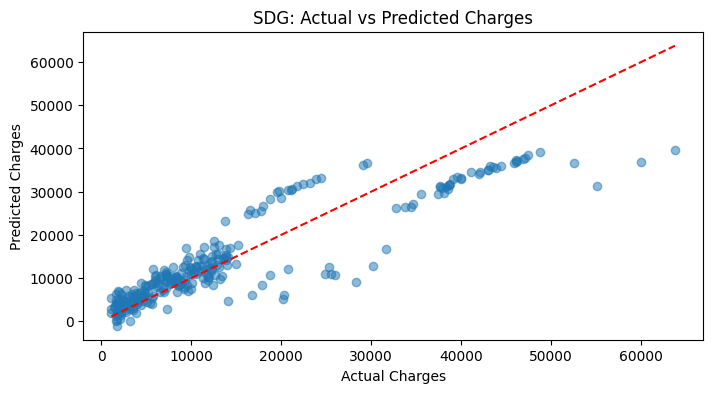

In [133]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred_sgd, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('SDG: Actual vs Predicted Charges')
plt.show()

###Decision Tree Regression Model

In [134]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [135]:
y_pred_dt = dt.predict(X_test_scaled)

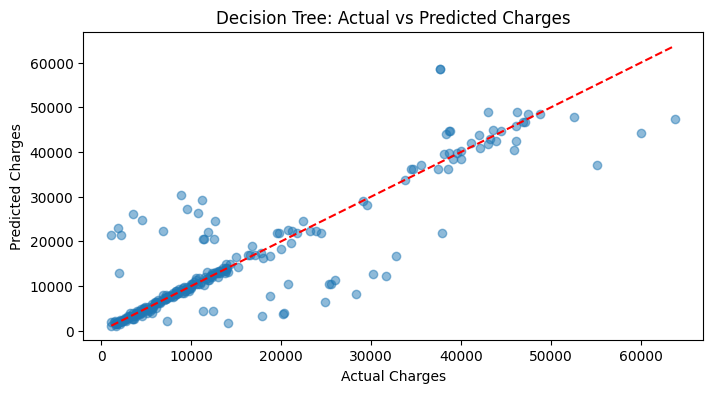

In [136]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Decision Tree: Actual vs Predicted Charges')
plt.show()

###Random Forest Regression Model

In [137]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [138]:
y_pred_rf = rf.predict(X_test_scaled)

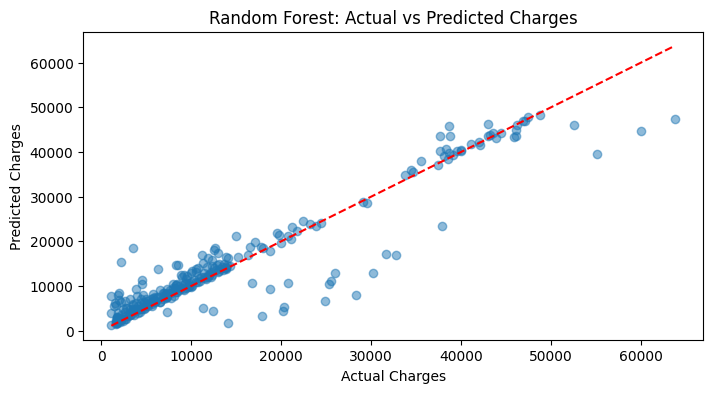

In [139]:
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Random Forest: Actual vs Predicted Charges')
plt.show()

###Model Evaluation

In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def print_metrics(name, y_true, y_pred):
    print(f'{name}:')
    print('  RMSE:', mean_squared_error(y_true, y_pred, ))
    print('  MAE:', mean_absolute_error(y_true, y_pred))
    print('  R2:', r2_score(y_true, y_pred))
    print()

print_metrics('Linear Regression', y_test, y_pred_lr)
print_metrics('Decision Tree', y_test, y_pred_dt)
print_metrics('Random Forest', y_test, y_pred_rf)
print_metrics('SGD', y_test, y_pred_sgd)


Linear Regression:
  RMSE: 35478020.67523557
  MAE: 4177.045561036322
  R2: 0.8069287081198013

Decision Tree:
  RMSE: 38211430.94221062
  MAE: 2794.84369544403
  R2: 0.7920534968921398

Random Forest:
  RMSE: 22035370.24284001
  MAE: 2599.377440866417
  R2: 0.8800835751580338

SGD:
  RMSE: 35446908.80272527
  MAE: 4182.819323553295
  R2: 0.8070980188452604



###My Best Model

In [141]:
import joblib
joblib.dump(rf, 'insurance_best_model.joblib')
joblib.dump(scaler, 'insurance_scaler.joblib')

['insurance_scaler.joblib']